#  Search Engine Based on StackOverflow Questions 

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Build a search engine based on StackOverflow questions, the search results should include the semantic meaning.

<p style='font-size:18px'><b> Source:</b>  https://archive.org/details/stackexchange  </p>


<h2> 1.2 Source / useful links </h2>

Data Source :https://archive.org/details/stackexchange <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : Word2Vec https://arxiv.org/abs/1301.3781 <br>
Research paper : Doc2Vec https://arxiv.org/abs/1405.4053  <br>
Research paper : BERT https://arxiv.org/abs/1810.04805  <br>
Research paper : Universal Sentance Encoder https://arxiv.org/abs/1803.11175  <br>
word2vec Blog : https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/



<h2> 1.3 Real World / Business Objectives and Constraints </h2> 


1. the search results should include the semantic meaning.
2. Think of scalable architecture and try to reduce the time to return the results.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<br>
All of the data is in 1 zip-file: stackoverflow.com-Posts.7z <br />
inside the zip file there one xml file : Posts.xml
<pre>
<b>Posts.xml</b> contains 16 columns: Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCoun,FavoriteCount <br />
<b>Size of Posts.xml</b> - 14.6GB<br />
<b>Number of rows in Posts.xml</b> = 3 Million records <br />
</pre>
<b>Note : </b> we are not using this whole data for this case study, due to limited resources and time constraints<br/>
<pre>

<b>the dataframe that we are using has 3 columns: </b> Id,title, Body  <br />

<b>Number of rows in dataframe</b> = 112357  <br />
</pre>

-> The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 112357  rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />

</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<h4>2.1.2.1 Posts.xml </h4>

Id="1" <br />
PostTypeId="1" <br />
AcceptedAnswerId="3" <br />
CreationDate="2016-08-02T15:39:14.947" <br />
Score="8" <br />
ViewCount="436" <br />
Body="&lt;p&gt;What does &quot;backprop&quot; mean? Is the &quot;backprop&quot; term basically the same as &quot;backpropagation&quot; or does it have a different meaning?&lt;/p&gt;&#xA;" <br />
OwnerUserId="8" <br />
LastEditorUserId="2444" <br /> 
LastEditDate="2019-11-16T17:56:22.093" <br />
LastActivityDate="2019-11-16T17:56:22.093" <br /> 
Title="What is &quot;backprop&quot;?" <br />
Tags="&lt;neural-networks&gt;&lt;backpropagation&gt;&lt;terminology&gt;&lt;definitions&gt;" <br />
AnswerCount="3" <br />
CommentCount="0" <br />
FavoriteCount="1" <br />

<h4>2.1.2.2 file1.csv </h4>

Id : "2214" <br/>

Title : <pre> "When will the AI can replace developer or tester"</pre> <br/>
Body : <pre> "&lt;p&gt;Now AI can replace call center, worker(in the factory) and going to replace court. When will the AI can replace developer or tester?&lt;/p&gt;&#xA;&#xA;&lt;p&gt;I want to know how long can AI replace developer. e.g. next 10 years because...&lt;/p&gt;&#xA;"</pre><br/>


<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre> <p>It is basically finding semamtic similarity between documents.Here, the terminology “document” could refer to a web-page, a word document, a paragraph of text, an essay, a sentence, or even just a single word.  <br>
Two semantically similar documents, will contain many of the same topics while two semantically different documents will not have many topics in common.  Machine learning methods are described which can take as input large collections of documents and use those documents to automatically learn semantic similarity relations.</pre>

<h3>2.2.2 Performance metric </h3>

<b>Cosine similarity</b> : 
Cosine similarity calculates similarity by measuring the
cosine of angle between two vectors. This is calculated as
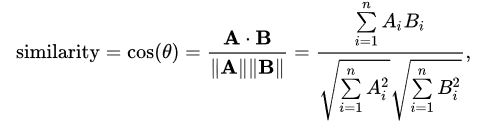
link: https://en.wikipedia.org/wiki/Cosine_similarity

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading </h2>

<h3> 3.1.1 downloading data and extracting the zip file </h3>

In [6]:
!wget --header 'Host: ia800107.us.archive.org' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:76.0) Gecko/20100101 Firefox/76.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://archive.org/details/stackexchange' --header 'Cookie: PHPSESSID=cv4gm885ijhaelfot7md17gtd7' --header 'Upgrade-Insecure-Requests: 1' 'https://ia800107.us.archive.org/27/items/stackexchange/academia.stackexchange.com.7z' --output-document 'academia.stackexchange.com.7z'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!pip install patool #installing patoolib
import patoolib #importing
patoolib.extract_archive('/content/academia.stackexchange.com.7z')#extracting archive

patool: Extracting /content/academia.stackexchange.com.7z ...
patool: running /usr/bin/7z x -o./Unpack_qbcmdwdk -- /content/academia.stackexchange.com.7z
patool: ... /content/academia.stackexchange.com.7z extracted to `academia.stackexchange.com' (multiple files in root).


'academia.stackexchange.com'

<h3> 3.1.2 parsing the xml file </h3>

In [0]:
#https://stackoverflow.com/questions/1912434/how-do-i-parse-xml-in-python
import xml.etree.ElementTree as ET
root = ET.parse('Posts.xml').getroot()

<h3> 3.1.3 extracting the title and body from xml file </h3>

In [0]:
title = []
text = []
count = 0
count2 = 0
for child in root.iter('row'):
    if child.attrib['PostTypeId'] == "1":#postTypeId ==1 means question post and postTypeId == 2 means answer post
        if child.attrib['Title'] is not None:
            title.append(child.attrib['Title'])
            text.append(child.attrib['Body'])

        elif child.attrib['Title'] is None:# in case if the post doesent have title it will just have body
            text.append(child.attrib['Body'])


In [25]:
len(text)

30994

<h3> 3.1.4 saving the title and text into dataframe and then into csv </h3>

In [0]:
import pandas as pd
df = pd.DataFrame({'title':title,"body":text})

In [27]:
df.head()

,title,body
0,What kind of Visa is required to work in Acade...,<p>As from title. What kind of visa class do I...
1,"As a computational chemist, which online resou...",<p>Which online resources are available for jo...
2,Where can I find the Impact Factor for a given...,<p>As from title. Not all journals provide the...
3,"In U.S., why do many engineering departments c...",<p>I have seen many engineering departments wa...
4,What is the h-index exactly and how does it work?,"<p>What is the h-index, and how does it work ?..."


In [0]:
df.to_csv('file1.csv') 